In [2]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data ()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
     

In [5]:
base_model=VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3))

80134624/80134624 [==============================] - 4s 0us/step


In [6]:
for layer in base_model.layers:
  layer.trainable = False

In [7]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense (512, activation = 'relu'))
model.add(Dropout (0.5))
model.add(Dense (10, activation= 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20,292,170
Trainable params: 267,786
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
model.compile (optimizer = Adam (learning_rate=0.001),loss = 'sparse_categorical_crossentropy',metrics='accuracy')

In [10]:
learning_rate_reduction = ReduceLROnPlateau (monitor = 'val_accuracy')

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/15
782/782 [==============================] - 23s 17ms/step - loss: 1.5018 - accuracy: 0.4668 - val_loss: 1.3127 - val_accuracy: 0.5375 - lr: 0.0010
Epoch 2/15
782/782 [==============================] - 13s 16ms/step - loss: 1.3249 - accuracy: 0.5313 - val_loss: 1.2629 - val_accuracy: 0.5493 - lr: 0.0010
Epoch 3/15
782/782 [==============================] - 13s 16ms/step - loss: 1.2667 - accuracy: 0.5532 - val_loss: 1.2111 - val_accuracy: 0.5749 - lr: 0.0010
Epoch 4/15
782/782 [==============================] - 13s 16ms/step - loss: 1.2333 - accuracy: 0.5663 - val_loss: 1.1853 - val_accuracy: 0.5824 - lr: 0.0010
Epoch 5/15
782/782 [==============================] - 13s 17ms/step - loss: 1.2056 - accuracy: 0.5749 - val_loss: 1.1785 - val_accuracy: 0.5874 - lr: 0.0010
Epoch 6/15
782/782 [==============================] - 14s 17ms/step - loss: 1.1837 - accuracy: 0.5827 - val_loss: 1.1657 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 7/15
782/782 [==============================] - 13s 

In [12]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

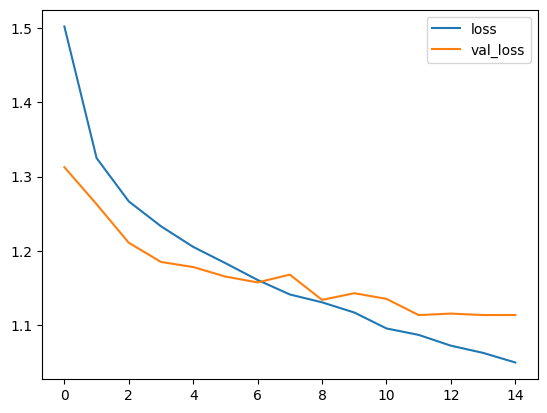

In [13]:
metrics[['loss','val_loss']].plot()

<Axes: >

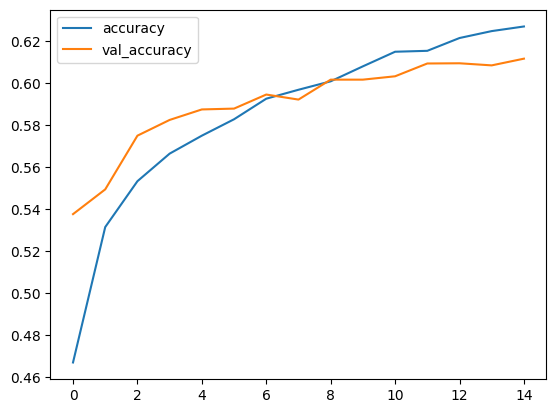

In [14]:
metrics[['accuracy','val_accuracy']].plot()

In [15]:
x_test_predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 9ms/step


In [16]:
print(confusion_matrix(y_test,x_test_predictions))

[[681  24  53  32  16   9  16  22  86  61]
 [ 27 660  17  54   7  10  27  13  26 159]
 [ 65  22 503  92  82  69 100  30  17  20]
 [ 23  37  55 540  40 114  95  32  14  50]
 [ 21  13  75 120 501  41  86 103  21  19]
 [ 10  23  54 248  47 477  57  51   3  30]
 [  9  16  48  80  67  35 715   9   8  13]
 [ 14  11  53  66  54  73  25 654   3  47]
 [ 83  65  17  46   9   1   7  12 668  92]
 [ 29 104   7  52   8   8  21  26  28 717]]


In [17]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1000
           1       0.68      0.66      0.67      1000
           2       0.57      0.50      0.53      1000
           3       0.41      0.54      0.46      1000
           4       0.60      0.50      0.55      1000
           5       0.57      0.48      0.52      1000
           6       0.62      0.71      0.67      1000
           7       0.69      0.65      0.67      1000
           8       0.76      0.67      0.71      1000
           9       0.59      0.72      0.65      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000

